In [9]:
# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/tmp/ipykernel_1163438/308549236.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [10]:
def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

## New plots - PraaS stores data in S3 and caches locally

In [22]:

data_path = os.path.join(os.path.pardir, 'data', 'latex-serving')

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_{size}.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_{size}.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)

mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '0.25 vCPU',
    'medium': '0.50 vCPU',
    'large': '1 vCPU',
    'largest': '2 vCPU'
}
    
praas_services = pd.concat(d).reset_index()
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'input'] = mapping[row['input']]
    
    
for index, row in praas_services.iterrows():
    praas_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_services.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 
    #print(p[1])

#praas_services['new_type'] = praas_services.apply(lambda x: x)
#praas_services['new_type'].apply(lambda x: [1, 2], axis=1) = f"{praas_services['type']}, {praas_services['input']}" 
    
print(praas_services)

mapping_compile = {
    'small-update': 'No Update',
    'large-update': 'Failure',
    'full': 'Recompilation',
    'default': ''
}
praas_compile = pd.concat(d2).reset_index()

for index, row in praas_compile.iterrows():
    praas_compile.loc[index, 'input'] = mapping_compile[row['input']]
    #print(p[1])
    
for index, row in praas_compile.iterrows():
    if row['input'] != "":
        praas_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}"
    else:
        praas_compile.loc[index, 'new_type'] = f"{row['type']}"
    praas_compile.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 

df_full = pd.concat([praas_compile, praas_services])

df_not_compile = df_full.loc[~df_full['new_type'].str.contains('compile')]
df_compile = df_full.loc[df_full['new_type'].str.contains('compile')]
print(df_full)

      index         type    input  repetition  input-size  output-size  \
0         0  update-file  Input 1           1         781           58   
1         1  update-file  Input 1           2         781           58   
2         2  update-file  Input 1           3         781           58   
3         3  update-file  Input 1           4         781           58   
4         4  update-file  Input 1           5         781           58   
...     ...          ...      ...         ...         ...          ...   
1595    395     get-file  Input 4          46          66       585416   
1596    396     get-file  Input 4          47          66       585416   
1597    397     get-file  Input 4          48          66       585416   
1598    398     get-file  Input 4          49          66       585416   
1599    399     get-file  Input 4          50          66       585416   

           time     size platform              new_type          new_size  
0     24.238503    small    praas  

In [26]:

d = []

d2 = []
for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_lambda_{size}.csv'))
    data['size'] = size
    data['platform'] = 'lambda'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)
    
    data = pd.read_csv(os.path.join(data_path, f'latex_compiling_lambda_{size}.csv'))
    data['size'] = size
    data['platform'] = 'lambda'
    data['time'] /= 1000.0 * 1000.0
    data.drop(['download-time', 'compile-time'],axis=1,inplace=True)
    d2.append(data)
    
mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '443 MiB',
    'medium': '885 MiB',
    'large': '1769 MiB',
    'largest': '3538 MiB'
}
    
lambda_services = pd.concat(d).reset_index()
for index, row in lambda_services.iterrows():
    lambda_services.loc[index, 'input'] = mapping[row['input']]
    
for index, row in lambda_services.iterrows():
    lambda_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    lambda_services.loc[index, 'new_size'] = f"Lambda, {mappings_size[row['size']]}" 

mapping_compile = {
    'small-update': 'No Update',
    'large-update': 'Failure',
    'full': 'Recompilation',
    'default': ''
}
lambda_compile = pd.concat(d2).reset_index()

for index, row in lambda_compile.iterrows():
    lambda_compile.loc[index, 'input'] = mapping_compile[row['input']]
    
for index, row in lambda_compile.iterrows():
    if row['input'] != "":
        lambda_compile.loc[index, 'new_type'] = f"{row['type']}, {row['input']}"
    else:
        lambda_compile.loc[index, 'new_type'] = f"{row['type']}"
    lambda_compile.loc[index, 'new_size'] = f"Lambda, {mappings_size[row['size']]}" 

    
df_lambda = pd.concat([lambda_compile, lambda_services])
print(lambda_compile)
df_lambda_not_compile = df_lambda.loc[~df_lambda['new_type'].str.contains('compile')]
df_lambda_compile = df_lambda.loc[df_lambda['new_type'].str.contains('compile')]
#print(df_full)

     index     type          input  repetition  input-size  output-size  \
0        0  compile  Recompilation           1          80        44984   
1        1  compile  Recompilation           2          80        44984   
2        2  compile  Recompilation           3          80        44985   
3        3  compile  Recompilation           4          80        44985   
4        4  compile  Recompilation           5          80        44985   
..     ...      ...            ...         ...         ...          ...   
795    195  compile        Failure          46          80         3598   
796    196  compile        Failure          47          80         3598   
797    197  compile        Failure          48          80         3598   
798    198  compile        Failure          49          80         3598   
799    199  compile        Failure          50          80         3598   

             time     size platform                new_type          new_size  
0    17292.843476  

In [27]:
full_data_not_compile = pd.concat([df_lambda_not_compile,df_not_compile])
full_data_compile = pd.concat([df_lambda_compile,df_compile])

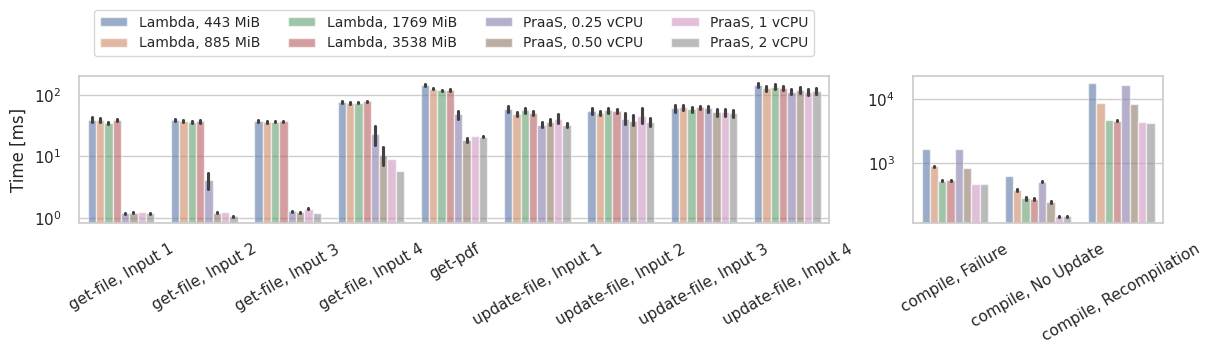

In [84]:
#print(full_data_compile)

from matplotlib.pyplot import figure

sns.set(rc={'figure.figsize':(12,3)})
sns.set_style("whitegrid")
#figure(figsize=(12,4), dpi=300)
#figure(figsize=(20,3), dpi=300)


fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3,1], layout='constrained')

#ax = plt.gca()

ax = ax1

#color = ['green','orange','red','blue','limegreen','darkgreen','royalblue','navy']

#import scienceplots
sns.set_style("whitegrid")
#plt.style.use(["science"])

from natsort import index_natsorted
import numpy as np
from natsort import natsort_keygen
#sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=lambda x: np.argsort(index_natsorted(df["time"])))
sorted_data = full_data_not_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    #errorbar="ci", 
    alpha=.6,#, height=6,
#    estimator=p50_estimator, #palette=color,
    #edgecolor = "none",
    seed=2024, errorbar=("ci", 95),
    ax=ax
)
#ax.set_xlabel('Service, benchmarking scenario')
ax.set_ylabel('Time [ms]')
ax.set_yscale('log')
ax.set_xlabel('')
#ax.xticks(rotation=30)
ax.tick_params(axis='x', labelrotation=30)
#ax.setp(ax.xaxis.get_majorticklabels(), ha='right')
#ax.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.5), fontsize=10, ncol=4)

ax = ax2

sorted_data = full_data_compile.sort_values(by=['new_type', 'new_size'], key=natsort_keygen())

sns.barplot(
    data=sorted_data,
    x="new_type", y="time", hue="new_size", #hue_order=["praas_local", "praas_remote", "aws"],
    #errorbar="ci", 
    alpha=.6,#, height=6,
    #estimator=p50_estimator, #palette=color,
    #edgecolor = "none",
    #linewidth=0,
    #edgecolor = "none",
    seed=2024, errorbar=("ci", 95),
    ax=ax
)
#plt.xlabel('Service, benchmarking scenario')
#plt.ylabel('Time [ms]')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=30)
#plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
#plt.legend(frameon=True)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=3)
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fontsize=8,ncol=4)
ax.legend().set_visible(False)


ax.figure.savefig("latex_full.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

Speedup on empty compilation

In [71]:
full_data_compile.groupby(['new_type', 'new_size'])['time'].mean()

new_type                new_size        
compile, Failure        Lambda, 1769 MiB      523.357663
                        Lambda, 3538 MiB      529.169754
                        Lambda, 443 MiB      1649.087179
                        Lambda, 885 MiB       873.298405
                        PraaS, 0.25 vCPU     1641.217442
                        PraaS, 0.50 vCPU      830.703091
                        PraaS, 1 vCPU         467.732022
                        PraaS, 2 vCPU         465.092129
compile, No Update      Lambda, 1769 MiB      277.486104
                        Lambda, 3538 MiB      274.036798
                        Lambda, 443 MiB       619.640424
                        Lambda, 885 MiB       378.074857
                        PraaS, 0.25 vCPU      502.007104
                        PraaS, 0.50 vCPU      242.326665
                        PraaS, 1 vCPU         145.074797
                        PraaS, 2 vCPU         144.541503
compile, Recompilation  Lambda, 1769 MiB     46

In [79]:
# 1.92x number from paper
print(274.036798/144.541503)
print(277.486104/145.074797)
print(378.074857/242.326665)
print(619.640424/502.007104)

1.895903891354997
1.912710613684333
1.5601867710266224
1.2343260066694195


Speedup on update-file

In [80]:
full_data_not_compile.loc[full_data_not_compile['new_type'].str.contains('update-file')].groupby(['new_type', 'new_size'])['time'].mean()

new_type              new_size        
update-file, Input 1  Lambda, 1769 MiB     55.185551
                      Lambda, 3538 MiB     49.608745
                      Lambda, 443 MiB      58.928927
                      Lambda, 885 MiB      48.321455
                      PraaS, 0.25 vCPU     32.432599
                      PraaS, 0.50 vCPU     35.527269
                      PraaS, 1 vCPU        40.533341
                      PraaS, 2 vCPU        32.101762
update-file, Input 2  Lambda, 1769 MiB     55.433428
                      Lambda, 3538 MiB     54.142039
                      Lambda, 443 MiB      54.490059
                      Lambda, 885 MiB      49.928348
                      PraaS, 0.25 vCPU     40.357980
                      PraaS, 0.50 vCPU     37.921718
                      PraaS, 1 vCPU        45.251950
                      PraaS, 2 vCPU        35.724281
update-file, Input 3  Lambda, 1769 MiB     57.376794
                      Lambda, 3538 MiB     62.100025
       

In [81]:
matchings = [
    ('Lambda, 3538 MiB', 'PraaS, 2 vCPU'),
    ('Lambda, 1769 MiB', 'PraaS, 1 vCPU'),
    ('Lambda, 885 MiB', 'PraaS, 0.50 vCPU'),
    ('Lambda, 443 MiB', 'PraaS, 0.25 vCPU')
]

# Function to compute ratios for all matchings
def compute_ratios(group):
    ratios = {}
    for lambda_size, praas_size in matchings:
        #print(group)
        lambda_value = group[group['new_size'] == lambda_size]['time'].mean()
        praas_value = group[group['new_size'] == praas_size]['time'].mean()
        #print(lambda_value, lambda_size)
        ratios[f"{lambda_size} vs {praas_size}"] = lambda_value / praas_value
    return pd.Series(ratios)

for new_size in ['update-file, Input 1', 'update-file, Input 2', 'update-file, Input 3', 'update-file, Input 4']:
    
    subset = full_data_not_compile.loc[full_data_not_compile['new_type'] == new_size]

# Group by 'input_number' and compute the ratios
    #print(subset)
    ratios = subset.groupby('new_type').apply(compute_ratios)
    print(ratios)

                      Lambda, 3538 MiB vs PraaS, 2 vCPU  \
new_type                                                  
update-file, Input 1                           1.545359   

                      Lambda, 1769 MiB vs PraaS, 1 vCPU  \
new_type                                                  
update-file, Input 1                           1.361485   

                      Lambda, 885 MiB vs PraaS, 0.50 vCPU  \
new_type                                                    
update-file, Input 1                             1.360123   

                      Lambda, 443 MiB vs PraaS, 0.25 vCPU  
new_type                                                   
update-file, Input 1                             1.816966  
                      Lambda, 3538 MiB vs PraaS, 2 vCPU  \
new_type                                                  
update-file, Input 2                           1.515553   

                      Lambda, 1769 MiB vs PraaS, 1 vCPU  \
new_type                                   

Comparison of get-file

In [82]:
full_data_not_compile.loc[full_data_not_compile['new_type'].str.contains('get-file')].groupby(['new_type', 'new_size'])['time'].mean()

new_type           new_size        
get-file, Input 1  Lambda, 1769 MiB    35.086408
                   Lambda, 3538 MiB    38.378653
                   Lambda, 443 MiB     39.125093
                   Lambda, 885 MiB     38.787657
                   PraaS, 0.25 vCPU     1.193984
                   PraaS, 0.50 vCPU     1.212256
                   PraaS, 1 vCPU        1.259919
                   PraaS, 2 vCPU        1.186978
get-file, Input 2  Lambda, 1769 MiB    36.052311
                   Lambda, 3538 MiB    36.646704
                   Lambda, 443 MiB     38.598332
                   Lambda, 885 MiB     37.838329
                   PraaS, 0.25 vCPU     4.076617
                   PraaS, 0.50 vCPU     1.222737
                   PraaS, 1 vCPU        1.268249
                   PraaS, 2 vCPU        1.067570
get-file, Input 3  Lambda, 1769 MiB    36.257108
                   Lambda, 3538 MiB    37.138343
                   Lambda, 443 MiB     36.900627
                   Lambda, 885 Mi

In [83]:
matchings = [
    ('Lambda, 3538 MiB', 'PraaS, 2 vCPU'),
    ('Lambda, 1769 MiB', 'PraaS, 1 vCPU'),
    ('Lambda, 885 MiB', 'PraaS, 0.50 vCPU'),
    ('Lambda, 443 MiB', 'PraaS, 0.25 vCPU')
]

# Function to compute ratios for all matchings
def compute_ratios(group):
    ratios = {}
    for lambda_size, praas_size in matchings:
        #print(group)
        lambda_value = group[group['new_size'] == lambda_size]['time'].mean()
        praas_value = group[group['new_size'] == praas_size]['time'].mean()
        #print(lambda_value, lambda_size)
        ratios[f"{lambda_size} vs {praas_size}"] = lambda_value / praas_value
    return pd.Series(ratios)

for new_size in ['get-file, Input 1', 'get-file, Input 2', 'get-file, Input 3', 'get-file, Input 4']:
    
    subset = full_data_not_compile.loc[full_data_not_compile['new_type'] == new_size]

# Group by 'input_number' and compute the ratios
    #print(subset)
    ratios = subset.groupby('new_type').apply(compute_ratios)
    print(ratios)

                   Lambda, 3538 MiB vs PraaS, 2 vCPU  \
new_type                                               
get-file, Input 1                          32.333085   

                   Lambda, 1769 MiB vs PraaS, 1 vCPU  \
new_type                                               
get-file, Input 1                          27.848155   

                   Lambda, 885 MiB vs PraaS, 0.50 vCPU  \
new_type                                                 
get-file, Input 1                            31.996248   

                   Lambda, 443 MiB vs PraaS, 0.25 vCPU  
new_type                                                
get-file, Input 1                            32.768516  
                   Lambda, 3538 MiB vs PraaS, 2 vCPU  \
new_type                                               
get-file, Input 2                          34.327222   

                   Lambda, 1769 MiB vs PraaS, 1 vCPU  \
new_type                                               
get-file, Input 2                  

Sticky invocations

In [93]:

data_path = os.path.join(os.path.pardir, 'data', 'latex-serving')

d = []

for size in ['small', 'medium', 'large', 'largest']:
    
    data = pd.read_csv(os.path.join(data_path, f'latex_editing_{size}_sticky.csv'))
    data['size'] = size
    data['platform'] = 'praas'
    data['time'] /= 1000.0 * 1000.0
    d.append(data)

mapping = {
    'secs/acks.tex': 'Input 1',
    'secs/multi.tex': 'Input 2',
    'secs/core.tex': 'Input 3',
    'sampleteaser.pdf': 'Input 4'
}
mappings_size = {
    'small': '0.25 vCPU',
    'medium': '0.50 vCPU',
    'large': '1 vCPU',
    'largest': '2 vCPU'
}
    
praas_sticky_services = pd.concat(d).reset_index()
for index, row in praas_sticky_services.iterrows():
    praas_sticky_services.loc[index, 'input'] = mapping[row['input']]
    
    
for index, row in praas_sticky_services.iterrows():
    praas_sticky_services.loc[index, 'new_type'] = f"{row['type']}, {row['input']}" 
    praas_sticky_services.loc[index, 'new_size'] = f"PraaS, {mappings_size[row['size']]}" 
    #print(p[1])

#praas_services['new_type'] = praas_services.apply(lambda x: x)
#praas_services['new_type'].apply(lambda x: [1, 2], axis=1) = f"{praas_services['type']}, {praas_services['input']}" 


In [108]:
sticky = praas_sticky_services.groupby(['new_type', 'new_size'])['time'].mean().reset_index()

In [109]:
original = full_data_not_compile.loc[(full_data_not_compile['new_type'] != 'get-pdf') & (full_data_not_compile['new_size'].str.contains('PraaS'))].groupby(['new_type', 'new_size'])['time'].mean().reset_index()

In [110]:
sticky['dataplane'] = original['time']
sticky['diff'] = sticky['time'] -  original['time']

In [111]:
sticky

,new_type,new_size,time,dataplane,diff
0,"get-file, Input 1","PraaS, 0.25 vCPU",1.893796,1.193984,0.699812
1,"get-file, Input 1","PraaS, 0.50 vCPU",3.782153,1.212256,2.569896
2,"get-file, Input 1","PraaS, 1 vCPU",2.068161,1.259919,0.808242
3,"get-file, Input 1","PraaS, 2 vCPU",1.954469,1.186978,0.767491
4,"get-file, Input 2","PraaS, 0.25 vCPU",2.158431,4.076617,-1.918185
5,"get-file, Input 2","PraaS, 0.50 vCPU",2.227984,1.222737,1.005247
6,"get-file, Input 2","PraaS, 1 vCPU",2.066728,1.268249,0.798479
7,"get-file, Input 2","PraaS, 2 vCPU",1.902429,1.067570,0.834859
8,"get-file, Input 3","PraaS, 0.25 vCPU",2.893870,1.280138,1.613732
9,"get-file, Input 3","PraaS, 0.50 vCPU",2.696763,1.240654,1.456109


In [105]:
original

,new_type,new_size,time
0,"get-file, Input 1","PraaS, 0.25 vCPU",1.193984
1,"get-file, Input 1","PraaS, 0.50 vCPU",1.212256
2,"get-file, Input 1","PraaS, 1 vCPU",1.259919
3,"get-file, Input 1","PraaS, 2 vCPU",1.186978
4,"get-file, Input 2","PraaS, 0.25 vCPU",4.076617
5,"get-file, Input 2","PraaS, 0.50 vCPU",1.222737
6,"get-file, Input 2","PraaS, 1 vCPU",1.268249
7,"get-file, Input 2","PraaS, 2 vCPU",1.067570
8,"get-file, Input 3","PraaS, 0.25 vCPU",1.280138
9,"get-file, Input 3","PraaS, 0.50 vCPU",1.240654
